# Introduction to Scikit-Learn (sklearn)

This notebook demonstrates some of the useful functions of the beatiful scikit-learn library.

What we're going to cover:

In [5]:
# Let's listify the contents
what_were_covering = [
"0. An end-to-end Scikit-Learn Workflow",
"1. Getting the data ready",
"2. Choose the right estimator/algorithm for or our problems",
"3. Fit the model/algorithm and use it to make predictions on our data",
"4. Evaluating a model",
"5. Improve a model",
"6. Save and load a trined model",
"7. Putting it all together!"
]

In [6]:
what_were_covering

['0. An end-to-end Scikit-Learn Workflow',
 '1. Getting the data ready',
 '2. Choose the right estimator/algorithm for or our problems',
 '3. Fit the model/algorithm and use it to make predictions on our data',
 '4. Evaluating a model',
 '5. Improve a model',
 '6. Save and load a trined model',
 '7. Putting it all together!']

In [7]:
#Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## 0. An end-to-end Scikit-Learn Workflow

In [8]:
# 1. Get the data ready
import pandas as pd
heart_disease = pd.read_csv("data/heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [9]:
# Create X (features matrix)
X = heart_disease.drop("target", axis = 1)

# Create Y (labels matrix)
Y = heart_disease["target"]

In [10]:
# 2. Choose the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

# We'll keep the deafult hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [11]:
# 3 Fit the model to the training data
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [12]:
import sklearn
sklearn.show_versions()


System:
    python: 3.12.8 | packaged by Anaconda, Inc. | (main, Dec 11 2024, 10:37:40) [Clang 14.0.6 ]
executable: /opt/miniconda3/envs/corsodata/bin/python
   machine: macOS-15.2-arm64-arm-64bit

Python dependencies:
      sklearn: 1.6.1
          pip: 24.2
   setuptools: 72.1.0
        numpy: 2.1.3
        scipy: 1.14.1
       Cython: None
       pandas: 2.2.3
   matplotlib: 3.10.0
       joblib: 1.4.2
threadpoolctl: 3.5.0

Built with OpenMP: True

threadpoolctl info:
       user_api: blas
   internal_api: openblas
    num_threads: 8
         prefix: libopenblas
       filepath: /opt/miniconda3/envs/corsodata/lib/libopenblasp-r0.3.21.dylib
        version: 0.3.21
threading_layer: pthreads
   architecture: armv8

       user_api: openmp
   internal_api: openmp
    num_threads: 8
         prefix: libomp
       filepath: /opt/miniconda3/envs/corsodata/lib/python3.12/site-packages/sklearn/.dylibs/libomp.dylib
        version: None


In [13]:
clf.fit(X_train, Y_train)

RandomForestClassifier()

In [14]:
# Make a prediction
Y_label = clf.predict(np.array([0,2,3,4]))

/opt/miniconda3/envs/corsodata/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[0. 2. 3. 4.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
Y_preds = clf.predict(X_test)
Y_preds

In [ ]:
Y_test

In [ ]:
# Evaluate the model on the training data and test data
clf.score(X_train, Y_train)

In [ ]:
clf.score(X_test, Y_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(Y_test, Y_preds))

In [ ]:
confusion_matrix(Y_test, Y_preds)

In [ ]:
accuracy_score(Y_test, Y_preds)

In [ ]:
# 5. Improve a model
# Try different amount of n_estimators

np.random.seed(42)

for i in range(10,100,10):
    print(f"Trying model with {i} estimators...")
    clf = RandomForestClassifier(n_estimators=i).fit(X_train, Y_train)

    print(f"Model accuracy on test set: {clf.score(X_test, Y_test) * 100:2f}%")
    print("")

In [ ]:
# 6. Save a model and load it
import pickle

pickle.dump(clf, open("random_forest_model_1", "wb"))

In [ ]:
loaded_model = pickle.load(open("random_forest_model_1", "rb"))
loaded_model.score(X_test, Y_test)

## 1. Getting our data ready to be used with machine learning

Three main things we have to do:
1. Split the data into features and labels (usally "X" & "Y")
2. Filling(also called imputing) or disregarding missing values
3. Converting non-numerical values to numerical values (also called feature encoding)




In [ ]:
heart_disease.head()

In [ ]:
X = heart_disease.drop("target", axis = 1)
X.head()

In [ ]:
y = heart_disease["target"]
y.head()

In [ ]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [ ]:
X.shape[0] * 0.8

In [ ]:
len(heart_disease)

### 1.1 Make sure it's all numerical

In [ ]:
car_sales = pd.read_csv("car-sales-extended.csv")
car_sales

In [ ]:
len(car_sales)

In [ ]:
car_sales.dtypes

In [ ]:
# Split into X/y
X = car_sales.drop("Price", axis = 1)
y = car_sales["Price"]

# Split into training and test
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.2)

In [ ]:
# Build machine learning model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

model.fit(X_train, y_train)
model.score(X_test, y_test)

In [ ]:
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorial_features = ["Make", "Colour", "Doors"]

one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                 one_hot,
                                 categorial_features)],
                               remainder="passthrough")
transformed_X = transformer.fit_transform(X)
transformed_X
    

In [ ]:
pd.DataFrame(transformed_X)

In [ ]:
# Metodo alternativo con pandas
dummies = pd.get_dummies(car_sales[["Make", "Colour", "Doors"]])
dummies

In [ ]:
# Let's refit the model
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(transformed_X,
                                                   y,
                                                   test_size=0.2)

model.fit(X_train, y_train)


In [ ]:
model.score(X_test, y_test)

### 1.2 What if there were missing values?

1. Fill them with some value (also known as imputation)
2. Remove the samples with missing data altogether

In [ ]:
# import car sales missing data

car_sales_missing = pd.read_csv("data/car-sales-extended-missing-data.csv")
car_sales_missing.head()

In [ ]:
car_sales_missing.isna().sum()

In [ ]:
# Create X & y
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]


In [ ]:
# let's try to convert to numbers
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorial_features = ["Make", "Colour", "Doors"]

one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                 one_hot,
                                 categorial_features)],
                               remainder="passthrough")
transformed_X = transformer.fit_transform(X)
transformed_X

In [ ]:
car_sales_missing["Doors"].value_counts()

#### Option 1: Fill missing data with Pandas

In [ ]:
# Fill the "Make" column
car_sales_missing["Make"] = car_sales_missing["Make"].fillna("missing")

# Fill the "Colour" column
car_sales_missing["Colour"] = car_sales_missing["Colour"].fillna("missing")

# Fill the "Odometer (KM)" column
car_sales_missing["Odometer (KM)"] = car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean())

# Fill the "Doors" Column
car_sales_missing["Doors"] = car_sales_missing["Doors"].fillna(4)

In [ ]:
# Check our dataframe again
car_sales_missing.isna().sum()

In [ ]:
# Remove rows with missin Price value
car_sales_missing.dropna(inplace=True)

In [ ]:
car_sales_missing.isna().sum()

In [ ]:
# Create X & y
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [ ]:
# let's try to convert to numbers
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorial_features = ["Make", "Colour", "Doors"]

one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                 one_hot,
                                 categorial_features)],
                               remainder="passthrough")
transformed_X = transformer.fit_transform(car_sales_missing)
transformed_X

In [ ]:
# Let's refit the model
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(transformed_X,
                                                   y,
                                                   test_size=0.2)

model.fit(X_train, y_train)

In [ ]:
model.score(X_test, y_test)

In [ ]:
### Option 2: Fill missing values with Scikit-Learn
car_missing_missing = pd.read_csv("data/car-sales-extended-missing-data.csv")
car_missing_missing.isna().sum()

In [ ]:
# Drop the rows with no labels (price)
car_missing_missing = car_missing_missing.dropna(subset=["Price"])
car_missing_missing.isna().sum()

In [ ]:
car_missing_missing.head()

In [ ]:
# Split into X & y
X = car_missing_missing.drop("Price", axis=1)
y = car_missing_missing["Price"]

In [ ]:
# Fill missing values with Scikit-Learn (imputation)
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with 'missing' and numerical values with mean
cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")
door_imputer = SimpleImputer(strategy="constant", fill_value=4)
num_imputer = SimpleImputer(strategy="mean")


# Define columns
cat_features = ["Make", "Colour"]
door_feature = ["Doors"]
num_feature = ["Odometer (KM)"]

# Create an imputer (something that fills missing data)
imputer = ColumnTransformer([
        ("cat_imputer", cat_imputer, cat_features),
        ("door_imputer", door_imputer, door_feature),
        ("num_imputer", num_imputer, num_feature)
])

# Transform the data
filled_X = imputer.fit_transform(X)
filled_X

In [ ]:
car_missing_filled = pd.DataFrame(filled_X,
                                  columns=["Make", "Colour", "Doors", "Odometer (KM)"])
car_missing_filled.head()

In [ ]:
car_missing_filled.isna().sum()

In [ ]:
# let's try to convert to numbers
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorial_features = ["Make", "Colour", "Doors"]

one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                 one_hot,
                                 categorial_features)],
                               remainder="passthrough")
transformed_X = transformer.fit_transform(car_missing_filled)
transformed_X

In [ ]:
# Now we've got our data as numbers and filled (no missing values)
# Let's fit a model
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(transformed_X,
                                                   y,
                                                   test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

## 2. Choosing the right estimator / algorithm for your problem
Some things to note:
* Sklearn refers to machine learning models, algorithms as estimators.
* Classification problem - predicting a catogory (heart disease or not)
    * Sometimes you'll see `clf` (short for classifier) used as a classiffication estimator
* Regression problem - predicting a number (selling price of car)

If you're working on a machine learning problem and looking to use Sklearn and not sure what model you should use, refer to the sklearn machine learning map: https://scikit-learn.org/stable/machine_learning_map.html

### 2.1 Picking a machine learning model for a regression problem
Let's use the California Housing Data set

In [ ]:
# Get California Housing Dataset
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

In [ ]:
housing_df= pd.DataFrame(housing["data"], columns=housing["feature_names"])
housing_df

In [ ]:
housing_df["MedHouseVal"]= housing["target"]
housing_df.head()

In [ ]:
housing_df["target"]= housing["target"]
housing_df.head()

In [ ]:
housing_df = housing_df.drop("MedHouseVal", axis=1)
housing_df.head()

In [ ]:
housing_df.isna().sum()

In [ ]:
# Import algorithm/estimator
from sklearn.linear_model import Ridge
# Setup random seed
np.random.seed(42)
# Create the data
X = housing_df.drop("target", axis=1)
y = housing_df["target"] # median house price in $ 100,000s

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.2)

# Instantiate and fit the model (on the training set)
model = Ridge()
model.fit(X_train, y_train)

# Check the score of the model on the test set
model.score(X_test,y_test)

what is `Ridge` didn't work or the score didn't fit our needs?
Well, we could always try a different model...

HOw about we try an enseble model (an ensemble is a combination of smaller models to try and make better predictions than just a single model)?

Skelearn's ensemble models can be found here: https://scikit-learn.org/stable/modules/ensemble.html

In [ ]:
# Import the RAndom Forest Regressor model class from the ensemble module
from sklearn.ensemble import RandomForestRegressor

# Setup Random seed
np.random.seed(42)

# Create the data
X = housing_df.drop("target", axis=1)
y = housing_df["target"] # median house price in $ 100,000s

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.2)
# Instantiate and fit the model (on the training set)
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Check the score of the model on the test set
model.score(X_test,y_test)

### 2.2 Choosing an estimator for a classification problem
Let's go on the map... https://scikit-learn.org/stable/machine_learning_map.html

In [ ]:
heart_disease = pd.read_csv("data/heart-disease.csv")
heart_disease.head()

Consulting the map and it says to try `LinearSVC`

In [ ]:
#import the LinearSVC estimator class
from sklearn.svm import LinearSVC

# Setup random seed
np.random.seed(42)

# Make the data

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# SPlit the data
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)
# instantiate LinearSVC

clf = LinearSVC()
clf.fit(X_train, y_train)

# Evaluate the Linear SVC
clf.score(X_test,y_test)


In [ ]:
heart_disease["target"].value_counts()

In [ ]:
#import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Make the data

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# SPlit the data
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)
# instantiate Random Forest Classifier

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Evaluate the Random Forest Classifier
clf.score(X_test,y_test)

Tidbit:
1. If you have structured data, used ensemble methods
2. If you have unstructured data, use deep learning or transfer learning

In [ ]:
heart_disease

## 3. Fit the model/algorithm on our data and use it to make predictions

### 3.1 Fitting the model to the data

Different names for:
* `X` = features, features variables, data
* `y` = labels, targets, target variables

In [ ]:
#import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
# Setup random seed
np.random.seed(42)

# Make the data

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# SPlit the data
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)
# instantiate Random Forest Classifier

clf = RandomForestClassifier()

# Fit the model to the data (training the machine learning model)
clf.fit(X_train, y_train)

# Evaluate the Random Forest Classifier (use the patterns the model has learned)
clf.score(X_test,y_test)

In [ ]:
X.head()

In [ ]:
y.head()

Passing `X` and `y` to `fit()` will cause the model to go through all of the examples in `X` (data) and see what their corresponding `y` (label) is.

How the model does this is different depending on the model you use.

Explaining the details of each would take an entire textbook.

For now, you could imagine it similar to how you would figure out patterns if you had enough time.

You'd look at the feature variables, `X`, the `age`, `sex`, `chol` (cholesterol) and see what different values led to the labels, `y`, `1` for heart disease, `0` for not heart disease.

This concept, regardless of the problem, is similar throughout all of machine learning.

**During training (finding patterns in data):**

A machine learning algorithm looks at a dataset, finds patterns, tries to use those patterns to predict something and corrects itself as best it can with the available data and labels. It stores these patterns for later use.

**During testing or in production (using learned patterns):**

A machine learning algorithm uses the patterns its previously learned in a dataset to make a prediction on some unseen data.

### 3.2 Make predictions using a machine learning model 

Now we've got a trained model, one which has hoepfully learned patterns in the data, you'll want to use it to make predictions.

Scikit-Learn enables this in several ways.

Two of the most common and useful are:
1. `predict()`
2. `predict_proba()`

Let's see them in action.

In [ ]:
# Use a trained model to make predictions
clf.predict(np.array([1,7,8,3,4])) # this doesn't work

In [ ]:
X_test.head()

In [ ]:
clf.predict(X_test)

In [ ]:
np.array(y_test)

In [ ]:
# Compare predictions to truth labels to evaluate the model
y_preds = clf.predict(X_test)
np.mean(y_preds == y_test)

In [ ]:
clf.score(X_test, y_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

Make predictions with `predict_proba()`

In [ ]:
# predict_proba() returns probabilities of a classification label
clf.predict_proba(X_test[:5])

In [ ]:
# let's predict() on the same data...
clf.predict(X_test[:5])

`predict()` can also be used for regression models.

In [ ]:
housing_df.head()

In [ ]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Create feature and label
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

# SPlit into training and tests sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.2)

# Create a model instance
model = RandomForestRegressor()

# Fit the model to the data
model.fit(X_train, y_train)


# Make predictions
y_preds =  model.predict(X_test)

In [ ]:
# Vediamo se le predizioni sono nello stesso formato dei nostri target originari

In [ ]:
y_preds[:10]

In [ ]:
np.array(y_test[:10])

In [ ]:
len(y_preds)

In [ ]:
len(y_test)

In [ ]:
# compare the predictions to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)


In [ ]:
housing_df["target"]

## 4. evaluating a machine learning model
Three ways to evaluate Scikit-Learn models/estimators:
1. Estimator's built-in `score()` method
2. The `scoring` parameter
3. Problem-specific metric functions

You can read more about these here: https://scikit-learn.org/1.5/modules/model_evaluation.html

In [ ]:
heart_disease.head()

### 4.1 Evaluating a model with the `score` method

In [ ]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Create X & y
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Create train / test
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.2)
# Create classifier model instance

clf = RandomForestClassifier()

# Fit classifier to training data

clf.fit(X_train, y_train)

In [ ]:
# The highest value for the .score() method is 1.0, the lowest is 0.0
clf.score(X_train, y_train)

In [ ]:
clf.score(X_test, y_test)

Let's use the `score()` method on our regression problem...

In [ ]:
housing_df.head()

In [ ]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Create X & y
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

# Create train test

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

# Create regression model

model = RandomForestRegressor()

# Fir regression to training data

model.fit(X_train, y_train)

In [ ]:
model.score(X_train, y_train)

In [ ]:
model.score(X_test, y_test)

### 4.2 Evaluating a model with the `scoring` parameter

In [ ]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Create X & y
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Create train / test
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.2)
# Create classifier model instance

clf = RandomForestClassifier()

# Fit classifier to training data

clf.fit(X_train, y_train)

In [ ]:
clf.score(X_test, y_test)

In [ ]:
cross_val_score(clf, X, y)

In [ ]:
# Questo ci permette di evitare i lucky score, in quanto viene usato tutto il data set

np.random.seed(42)

# Single training and test split score

clf_single_score = clf.score(X_test, y_test)

# Take the mean of 5-fold cross-validation score
clf_cross_val_score = np.mean(cross_val_score(clf, X, y, cv = 5))

#Compare the two

clf_single_score, clf_cross_val_score

In [ ]:
# default scoring parameter of classifier = mean accuracy
clf.score()

In [ ]:
# Scoring parameter set to None by default
cross_val_score(clf, X, y, cv=5, scoring=None)

# 4.2.1 Classification model evaluation metrics
1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report

### Accuracy

In [ ]:
heart_disease.head()

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import numpy as np

np.random.seed(42)

X = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)

clf = RandomForestClassifier()

clf.fit(X_train, y_train)

cross_val_score = cross_val_score(clf, X, y, cv = 5)



In [ ]:
np.mean(cross_val_score)

In [ ]:
print(f"Heart disease Classifier Cross-Validated Accuracy: {np.mean(cross_val_score) *100:.2f}%")

### Area under ROC(receiver operating characteristic) curve (AUC/ROC)
* Area under curve (AUC)
* ROC curve

ROC curves are a comparison of a model's true positive rate (tpr) versus a models false positive rate (fpr)

- **True positive:** quando un modello predice 1 quando la verità è 1
- **False positive**:quando il modello predice 1 quando la verità è 0
- **True negative**: quando un modello predice 0 e la verità è 0
- **False Negative**: Quando il modello predice 0 e la verità è 1

In [ ]:
from sklearn.metrics import roc_curve

# Make predictions with probabilities

y_probs = clf.predict_proba(X_test)

y_probs[:5]

In [ ]:
y_probs_positive = y_probs[:,1]
y_probs_positive[:5]

In [ ]:
# calculate fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

# CHeck the false positive rates
fpr

In [ ]:
# Create a function for plotting ROC curves
# Quando dovremmo fare multipli plot, creeremo una funziona da richiamare tutte le volte che ci servirà

import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positive rate (fpr)
    and true positive rate (tpr) of a model.
    """
    # Plot roc curve
    plt.plot(fpr, tpr, color="orange", label="ROC")
    # Plot line with no predictive power (baseline)
    plt.plot([0,1],[0,1], color="darkblue", linestyle="--", label="Guessing")

    # CUstomize the plot
    plt.xlabel("False Positive Rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Receiver Operating Characteristic (ROC) curve")

    plt.legend()
    plt.show()

plot_roc_curve(fpr,tpr)
    

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_probs_positive)

In [ ]:
# Plot perfect ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [ ]:
# Perfect AUC score
roc_auc_score(y_test,y_test)

**Confusion Matrix**

A confusione matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict.

In essence, giving you an idea of where the model is getting confused.


In [ ]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)

In [ ]:
# Visualize confusion matrix with pd.crosstab()

pd.crosstab(y_test,
            y_preds,
            rownames=["Actual Labels"],
            colnames=["Predicted Labels"])

In [ ]:
24 + 5 + 4 + 28

In [ ]:
len(y_preds), len(y_test)

In [ ]:
# How install a conda package into the current enviroment form a jupiter notebook
#import sys
# !conda install --yes --prefix {sys.prefix} seaborn

In [ ]:
# !ls

In [ ]:
# Make out confusion matrix more visual with Seaborn's heatmap() (una libreria di visualizzazione costruita su mathplotlib)
# Dobbiamo installare seaborn nell'enviroment con `conda install seaborn` oppure in jupiter notebook

import seaborn as sns


# set the font scale
sns.set(font_scale=1.5)

# Create a confusion matrix
conf_mat = confusion_matrix(y_test, y_preds)

# plot it using Seaborn

sns.heatmap(conf_mat)

## Creating a confusion metrix using scikit-learn
TO use the new methods of creating a confusion matrix with Scikit learn you will need sklearn version 1.0+

In [ ]:
import sklearn
sklearn.__version__

In [ ]:
clf

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator = clf, X =X, y=y)

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_true= y_test,
                                       y_pred= y_preds)

### Classification Report

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

In [ ]:
# Where precision and recall become valuable
disease_true = np.zeros(10000)
disease_true[0] = 1 #only one positive case

disease_preds = np.zeros(10000) # model predicts every case as 0

pd.DataFrame(classification_report(disease_true, disease_preds, output_dict=True))

Anche se il modello ha un accuracy del 99% , non può prevedere l'unico caso di positività.

To summarize classification metrics:
- **Accuracy** is a good measure to start with if all classes ara balanced (e.g. Same amount of sample)
- **Precision** and **Recall** become more important when classes are imbalanced
- If false positive predictions are worse than false negative, aim for higher precision.
- if false negative predictions are worse than false positive, aim for higher recall.
- **F1-score** is a combination of precision and recall

### 4.2.2 Regression model evaluation metrics

Model evaluation metrics documentation - https://scikit-learn.org/1.5/modules/model_evaluation.html#regression-metrics

The ones we're going to cover are:
1. R^2 (pronounced r-squared) or coefficient of determination
2. Mean absolute error (MAE)
3. Mean Squered error (MES)

**$R^2$**

What R-squeared doese: Compares your model predictions to the mean of the targets. Values can range from negative infinity (a very poor model) to 1. For example, if all your model does is predict the mean of the targets, it's $R^2$ value would be 0. And if your model perfectly predicts a range of numbers it's $R^2$ score would be 1. 

In [ ]:
housing_df.head()

In [ ]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop("target", axis=1)
y = housing_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train)

In [ ]:
model.score(X_test, y_test)

In [ ]:
y_test

In [ ]:
y_test.mean()

In [ ]:
from sklearn.metrics import r2_score

# fill an array with y_test mean

y_test_mean = np.full(len(y_test), y_test.mean())

In [ ]:
y_test_mean[:10]

In [ ]:
r2_score(y_true=y_test,
         y_pred = y_test_mean)

In [ ]:
r2_score(y_true=y_test,
         y_pred = y_test)

**Mean Absolute error (MAE)**

MAE is the average of the absolute differences between predictions and actual values.
It gives you an idea of how wrong your models predictions are.

In [ ]:
# MAE
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)
mae = mean_absolute_error(y_test, y_preds)
mae

In [ ]:
y_preds

In [ ]:
y_test

In [ ]:
df = pd.DataFrame(data = {"actual values": y_test,
                         "predicted values": y_preds})
df["differences"] = df["predicted values"] -  df["actual values"]

df.head(10)

In [ ]:
# MAE using formula formulas and differences
np.abs(df["differences"]).mean()

**Mean Squared error (MSE)**

MSE is the mean of the square of the errors between actual and predicted values.

In [ ]:
# MSE
from sklearn.metrics import mean_squared_error

y_preds = model.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
mse

In [ ]:
df.head()

In [ ]:
df["squared differces"] = df["differences"] ** 2
df.head()

In [ ]:
df["squared differces"].mean()

### 4.2.3 Finally using the `scoring` parameter

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier()

In [ ]:
np.random.seed(42)

# Cross-validation accuracy, divide il nostro set in più alberi decisionali
cv_acc = cross_val_score(clf, X, y, cv = 5, scoring = None) # if scoring=None, estimator's default scoring evaluation metric is used (accuracy per classification model)
cv_acc

In [ ]:
# Cross-validated accuracy
print(f"The cross-validated accuracy is: {np.mean(cv_acc)*100:2f}%")

In [ ]:
np.random.seed(42)

cv_acc = cross_val_score(clf, X, y, cv = 5, scoring = "accuracy") 
cv_acc

In [ ]:
# Cross-validated accuracy
print(f"The cross-validated accuracy is: {np.mean(cv_acc)*100:2f}%")

In [ ]:
# Precision
np.random.seed(42)
cv_precision = cross_val_score(clf, X, y, cv=5, scoring ="precision")
cv_precision

In [ ]:
print(f"The cross-validated precision is: {np.mean(cv_precision)}")

In [ ]:
# Recall
np.random.seed(42)
cv_recall = cross_val_score(clf, X, y, cv=5, scoring="recall")
cv_recall

In [ ]:
print(f"The cross-validated recall is: {np.mean(cv_recall)}")

Let's see the `scoring` parameter being using a regression problem...

In [ ]:
housing_df.head()

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop("target", axis=1)
y = housing_df["target"]


model = RandomForestRegressor()

In [ ]:
np.random.seed(42)
cv_r2 = cross_val_score(model, X, y, cv = 3, scoring=None) # default none, coefficient of determination r^2
np.mean(cv_r2)

In [ ]:
cv_r2

In [ ]:
# Mean squared error (lower is better)

cv_mse = cross_val_score(model, X, y, cv = 5, scoring="neg_mean_squared_error")

np.mean(cv_mse)

In [ ]:
cv_mse

In [ ]:
# Mean absolute error

cv_mae = cross_val_score(model, X, y, cv = 5, scoring="neg_mean_absolute_error")

np.mean(cv_mae)

In [ ]:
cv_mae

### 4.3 Using different evaluation metrics as Scikit-Learn functions
The 3rd way to evaluate scikit-learn machine learning models/estimators is to use the `sklearn.metrics` module https://scikit-learn.org/stable/modules/model_evaluation.html

In [ ]:
heart_disease.head()

In [ ]:
# classification problem

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split

np.random.seed(42)

# Create X & y
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create model

clf = RandomForestClassifier()


# fit model 

clf.fit(X_train, y_train)

# make prediction
y_pred = clf.predict(X_test)

# Evaluate model using evaluation functions
print("Classifier metrics on the test set")
print(f"Accuracy: {accuracy_score(y_test, y_pred)* 100:.2f}%")
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")
print(f"F1: {f1_score(y_test, y_pred)}")


In [ ]:
# regression problem
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

# Create X & y
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create model

model = RandomForestRegressor()

# fit model 

model.fit(X_train, y_train)


# make prediction
y_pred = model.predict(X_test)


# Evaluate model using evaluation functions
print("Regression metrics on the test set")
print(f"R2 score: {r2_score(y_test, y_pred)}")
print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
print(f"MSE: {mean_squared_error(y_test, y_pred)}")

### 5. Improving a model

First predictions = baseline predictions.
First model = baseline model.

Ci sono due modi per farlo:
1. From a data perspective:
* Could we collect more data? (generally, the more data, the better)
* Could we improve out data? (esempio aggiungere features, avere più informazioni per ogni campione, invece di avere più campioni)

2. From a model perspective:
* Is there a better model we could use? (Mappa degli estimatori: https://scikit-learn.org/dev/machine_learning_map.html ) es. un modello da ensemble come il RandomForest
* Could we improve the current model? (Se il modello scelto funziona bene, possiamo modificare gli iper parametri per migliorarlo?)


Hyperparameters vs. Parameters
* Parametri = Il modello trova pattern tra i dati in maniera autonoma
* Iper-Parametri = Sono impostazioni su un modello che possiamo aggiustare per (potenzialmente) migliorare le sue abilità di trovare patterns.


Ci sono trem odi per aggiustare gli iper parametri:
1. A mano
2. In maniera Randomica con `RandomSearchCV`
3. In maniera esaustiva con `GridSearchCV`

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

In [ ]:
clf.get_params()

### 5.1 Tuning Hyperparameters by hand

Let's make 3 sets, training, validation and test

In [ ]:
clf.get_params()

We're going to try and adjust:

* `max_depth`
* `max_features`
* `min_sample_leaf`
* `min_sample_split`
* `n_estimators`


In [16]:
def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison on y_true labels vs. y_pred labels
    on a classification model.
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy": round(accuracy, 2),
                  "precision": round(precision, 2),
                  "recall": round(recall, 2),
                  "f1": round(f1, 2)}
    print(f"Acc:{accuracy * 100: .2f} %")
    print(f"Precision: {precision: .2f}")
    print(f"Recall:{recall: .2f}")
    print(f"F1 score:{f1 :.2f}")

    return metric_dict

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
np.random.seed(42)

# Shuffle the data (non vogliamo che ci sia un ordine nei dati)
heart_disease_shuffled = heart_disease.sample(frac=1)

# Split into X & y

X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# Split the data into train, validation & test sets

train_split = round(0.7 * len(heart_disease_shuffled)) # 70% of data
valid_split = round(train_split + 0.15 * len(heart_disease_shuffled)) # 15% of data
X_train, y_train = X[:train_split], y[:train_split]
X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]
X_test, y_test = X[valid_split:], y[valid_split]


# len(X_train), len(X_valid), len(X_test)
# (212, 45, 46)

# Instanziamo il modello e lo nutriamo

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Make base line predictions
y_preds = clf.predict(X_valid)

# Evaluate the classifier on validation test

baseline_metrics = evaluate_preds(y_valid, y_preds)
baseline_metrics


Acc: 82.22 %
Precision:  0.81
Recall: 0.88
F1 score:0.85


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}

In [29]:
np.random.seed(42)

# Create a second classifier  with different hyperparameters
clf_2 = RandomForestClassifier(n_estimators=1000)
clf_2.fit(X_train, y_train)

# Make predictions with different hyperparameters
y_preds_2 = clf_2.predict(X_valid)

# Evaluate the 2nd classifier
clf_2_metrics = evaluate_preds(y_valid, y_preds_2)
clf_2_metrics

Acc: 93.33 %
Precision:  0.92
Recall: 0.96
F1 score:0.94


{'accuracy': 0.93, 'precision': 0.92, 'recall': 0.96, 'f1': 0.94}

In [18]:
# ora useremo max_depth
clf_3 = RandomForestClassifier(n_estimators=100, max_depth=1000)
clf_3.fit(X_train, y_train)

# Make predictions with different hyperparameters
y_preds_3 = clf_3.predict(X_valid)

# Evaluate the 2nd classifier
clf_3_metrics = evaluate_preds(y_valid, y_preds_3)
clf_3_metrics

Acc: 82.22 %
Precision:  0.81
Recall: 0.88
F1 score:0.85


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}

# 5.2 Hyperparametert tuning with RandomizedSearchCV (cross validation)

In [19]:
heart_disease_shuffled.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1,0
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3,0
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3,1
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3,0
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2,1


In [20]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
# creiamo una griglia (dizionario) dei parametri che vogliamo modificare come keys e i valori da usare come values.
grid = {"n_estimators": [10,100, 200,500, 1000, 1200], # Numero di alberi
       "max_depth": [None, 5, 10, 20, 30], # Profondità massima
       #"max_features": ["auto", "sqrt"], # Numero di feature, auto da errore in versioni recenti di sklearn
        "max_features": ["sqrt", "log2"], # Numero di feature
       "min_samples_split": [2,4,6], # Minimo di campioni per split
       "min_samples_leaf": [1,2,4]} # Minimo di campioni per foglia

np.random.seed(42)

# SPlit into X & y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1) # default None, indica quando parte del processore del nostro computer verrà usato
# Usa tutti i core disponibili se `n_jobs=-1`
# Setup RandomizeSearchCV
rs_clf = RandomizedSearchCV(estimator=clf,
                            param_distributions=grid,
                            n_iter=10,  # Numero di combinazioni casuali da testare (degli iperparametri che abbiamo impostato in grid)
                            cv=5, # Numero di fold per la validazione incrociata
                            verbose=2)

# Eseguiamo RandomizedSearch CV con il FIT 
rs_clf.fit(X_train, y_train)

# Risultati migliori
print(f"Migliori parametri: {rs_clf.best_params_}") # Ci mostra la migliore combinazione di parametri
print(f"Migliore accuratezza: {rs_clf.best_score_}")

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   0.5s
[CV] END max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   0.4s
[CV] END max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   0.4s
[CV] END max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   0.4s
[CV] END max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   0.5s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100

In [21]:
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'log2',
 'max_depth': None}

In [ ]:
# Da questo momento utilizzerà il modello con i migliori parametri trovato tra i 50 che ha testato

In [22]:
# Make predictions with the best hyperparameters
rs_y_preds = rs_clf.predict(X_test)

# Evaluate the predictions
rs_metrics = evaluate_preds(y_test, rs_y_preds)

Acc: 81.97 %
Precision:  0.77
Recall: 0.86
F1 score:0.81


### 5.3 Hyperparameter tuning with GridSearchCV

In [23]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['sqrt', 'log2'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [ ]:
6*5*2*3*3*5

In [24]:
grid_2 = {'n_estimators': [100,200,500],
          'min_samples_split': [6],
          'min_samples_leaf': [1,2],
          'max_features': ['log2'],
          'max_depth': [None]}

In [ ]:
3*1*2*1*1*5

In [25]:
from sklearn.model_selection import GridSearchCV, train_test_split

np.random.seed(42)

# SPlit into X & y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1) # default None, indica quando parte del processore del nostro computer verrà usato
# Usa tutti i core disponibili se `n_jobs=-1`

# Setup GridSearchCV
gs_clf = GridSearchCV(estimator=clf,
                       param_grid=grid_2,
                       cv=5, # Numero di fold per la validazione incrociata
                       verbose=2)

# Eseguiamo GridSearchCV con il FIT 
gs_clf.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=6, n

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
             param_grid={'max_depth': [None], 'max_features': ['log2'],
                         'min_samples_leaf': [1, 2], 'min_samples_split': [6],
                         'n_estimators': [100, 200, 500]},
             verbose=2)

In [26]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 100}

In [27]:
gs_y_preds= gs_clf.predict(X_test)

# Evaluate the predictions
gs_metrics = evaluate_preds(y_test, gs_y_preds)

Acc: 81.97 %
Precision:  0.77
Recall: 0.86
F1 score:0.81


Let's compare our different models metrics.

<Axes: >

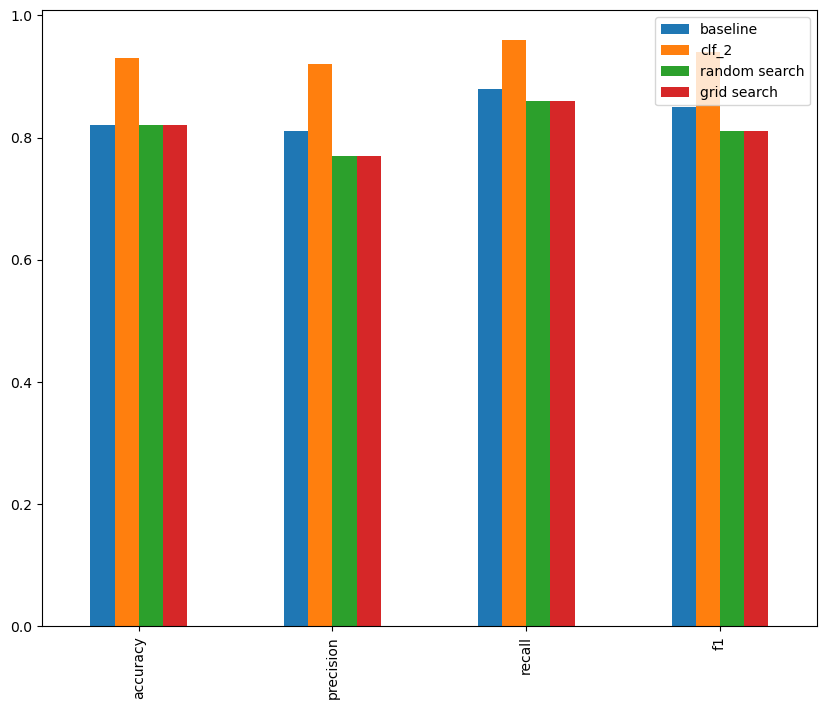

In [30]:
compare_metrics = pd.DataFrame({"baseline": baseline_metrics,
                               "clf_2": clf_2_metrics,
                               "random search": rs_metrics,
                               "grid search": gs_metrics})
compare_metrics.plot.bar(figsize=(10,8))

## 6. Saving and loading trained machine learning models
Due modi per salvare e caricare i modelli di machine learning:
1. With Python's `pickle` module
2. With the `joblib` module

**Pickle** 

In [31]:
import pickle

# Save an existing model to file
pickle.dump(gs_clf, open("gs_random_random_forest_model_1.pkl", "wb"))


In [32]:
# Load a saved model 
loaded_pickle_model = pickle.load(open("gs_random_random_forest_model_1.pkl", "rb"))

In [33]:
# Make some prediction with loaded model
picke_y_preds= loaded_pickle_model.predict(X_test)
evaluate_preds(y_test, picke_y_preds)

Acc: 81.97 %
Precision:  0.77
Recall: 0.86
F1 score:0.81


{'accuracy': 0.82, 'precision': 0.77, 'recall': 0.86, 'f1': 0.81}

**Joblib**

In [34]:
from joblib import dump, load

# save model to file
dump(gs_clf, filename="gs_random_forest_model_1.joblib")

['gs_random_forest_model_1.joblib']

In [35]:
# Import a saved joblib model
loaded_job_model = load(filename="gs_random_forest_model_1.joblib")

In [36]:
# Make and evaluate joblib predictions
joblib_y_preds = loaded_job_model.predict(X_test)

evaluate_preds(y_test, joblib_y_preds)

Acc: 81.97 %
Precision:  0.77
Recall: 0.86
F1 score:0.81


{'accuracy': 0.82, 'precision': 0.77, 'recall': 0.86, 'f1': 0.81}